In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/train.csv')

In [3]:
data.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [4]:
data.shape

(250000, 32)

In [5]:
# Make s=1 and b=-1
data.Prediction = data.Prediction.apply(lambda x: 1 if x=='s' else -1)

In [6]:
data.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,1,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,-1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,-1,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,-1,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,-1,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [7]:
y = data['Prediction']
data = data.drop(['Id','Prediction'],axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 30 columns):
DER_mass_MMC                   250000 non-null float64
DER_mass_transverse_met_lep    250000 non-null float64
DER_mass_vis                   250000 non-null float64
DER_pt_h                       250000 non-null float64
DER_deltaeta_jet_jet           250000 non-null float64
DER_mass_jet_jet               250000 non-null float64
DER_prodeta_jet_jet            250000 non-null float64
DER_deltar_tau_lep             250000 non-null float64
DER_pt_tot                     250000 non-null float64
DER_sum_pt                     250000 non-null float64
DER_pt_ratio_lep_tau           250000 non-null float64
DER_met_phi_centrality         250000 non-null float64
DER_lep_eta_centrality         250000 non-null float64
PRI_tau_pt                     250000 non-null float64
PRI_tau_eta                    250000 non-null float64
PRI_tau_phi                    250000 non-null float64
PRI_lep_p

In [9]:
# We don't have NaN values
data.isnull().values.any()

False

In [10]:
missing_values = dict()
for each in data.columns:
    missing_values[each] = np.sum(data[each]==-999)

In [11]:
# number of -999s in each column
missing_values

{'DER_mass_MMC': 38114,
 'DER_mass_transverse_met_lep': 0,
 'DER_mass_vis': 0,
 'DER_pt_h': 0,
 'DER_deltaeta_jet_jet': 177457,
 'DER_mass_jet_jet': 177457,
 'DER_prodeta_jet_jet': 177457,
 'DER_deltar_tau_lep': 0,
 'DER_pt_tot': 0,
 'DER_sum_pt': 0,
 'DER_pt_ratio_lep_tau': 0,
 'DER_met_phi_centrality': 0,
 'DER_lep_eta_centrality': 177457,
 'PRI_tau_pt': 0,
 'PRI_tau_eta': 0,
 'PRI_tau_phi': 0,
 'PRI_lep_pt': 0,
 'PRI_lep_eta': 0,
 'PRI_lep_phi': 0,
 'PRI_met': 0,
 'PRI_met_phi': 0,
 'PRI_met_sumet': 0,
 'PRI_jet_num': 0,
 'PRI_jet_leading_pt': 99913,
 'PRI_jet_leading_eta': 99913,
 'PRI_jet_leading_phi': 99913,
 'PRI_jet_subleading_pt': 177457,
 'PRI_jet_subleading_eta': 177457,
 'PRI_jet_subleading_phi': 177457,
 'PRI_jet_all_pt': 0}

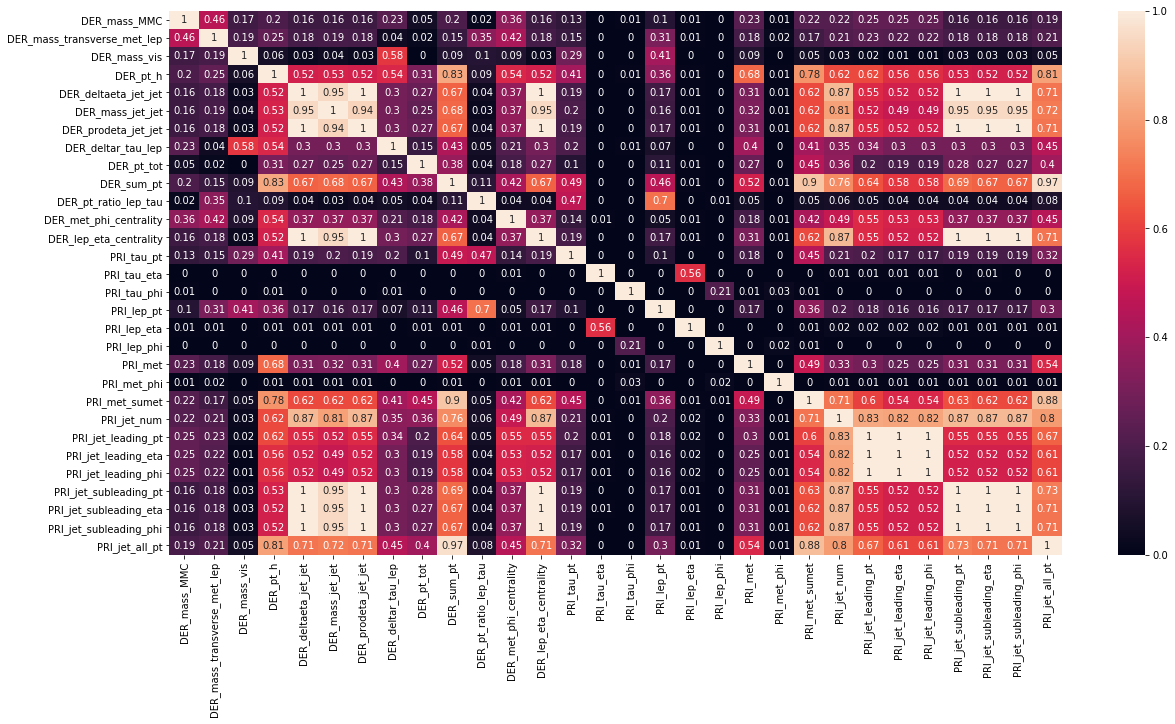

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(np.abs(np.round(data.corr(), decimals=2)),annot=True);

In [13]:
# let's take only columns with 0 number of -999
new_columns = []
for key, value in missing_values.items():
    if value==0:
        new_columns.append(key)
print(new_columns)

['DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt']


In [14]:
data_new = data[new_columns].copy()
data_new.head()

,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
0,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,113.497
1,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226
2,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251
3,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,0.000
4,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.000


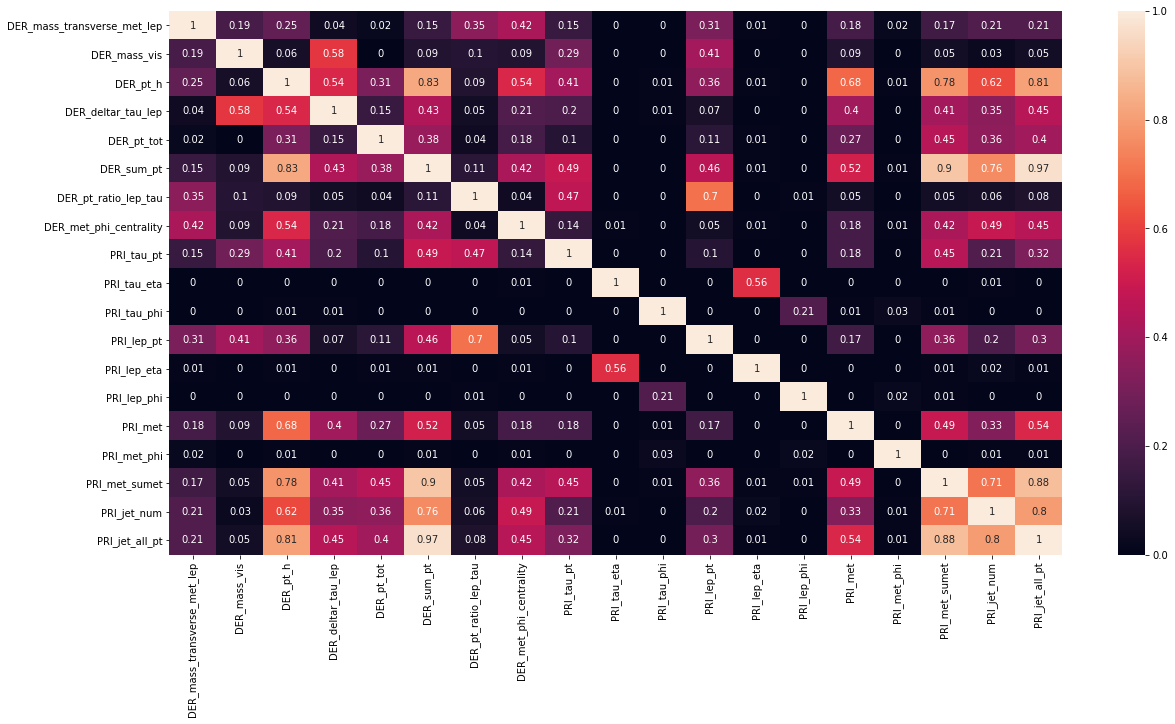

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(np.abs(np.round(data_new.corr(), decimals=2)),annot=True);

In [16]:
# standardize data
data_new = pd.DataFrame(preprocessing.StandardScaler().fit_transform(data_new.values),columns=data_new.columns)
data_new.head()

,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
0,0.068332,0.407680,-0.469966,0.882478,1.033099,0.339894,0.170929,1.277084,-0.270811,0.846712,0.214212,0.225054,1.812288,-1.352820,-0.756757,-0.147267,0.386847,1.044402,0.412510
1,0.552505,0.540136,-0.153167,1.404888,-0.756027,-0.287584,-0.661279,1.292164,0.147536,1.688504,-1.652849,-0.441526,0.411475,0.032730,0.090798,-1.051683,-0.357719,0.021305,-0.273820
2,3.195156,1.096560,-0.349710,0.989770,-0.430168,0.340361,2.768174,1.292164,-0.292406,-0.571650,-1.147554,3.387682,-0.737951,0.555132,0.382001,-1.200672,0.400135,0.021305,-0.293970
3,0.910379,-0.005853,-0.903016,1.196690,-0.830735,-0.712705,1.084818,-0.969095,-0.716598,-1.354138,0.010002,0.301873,-0.397234,-1.730447,-0.323312,0.038692,-0.978149,-1.001792,-0.745439
4,-0.914556,1.313369,-0.651804,1.938794,-0.112795,-0.868143,-0.451747,-1.052877,-0.468428,-1.800568,-1.223513,-0.765298,0.646261,0.839728,-1.185429,-0.475042,-1.238475,-1.001792,-0.745439


In [17]:
print('Number of 1s = {}'.format(len(y[y==1])))
print('Number of -1s = {}'.format(len(y[y==-1])))
print('Thus baseline accuracy = {}%'.format(100*len(y[y==-1])/(len(y))))

Number of 1s = 85667
Number of -1s = 164333
Thus baseline accuracy = 65.7332%


In [18]:
model_logit = LogisticRegression(random_state=42)
# model_tree = DecisionTreeClassifier(max_depth=6,random_state=42)
# model_gb = GradientBoostingClassifier(random_state=42)

In [19]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(data_new,y,test_size=0.25,random_state = 42)

In [20]:
print("LogisticRegression")
model_logit.fit(x_train,y_train)
print('Train set accuracy = {}%'.format(model_logit.score(x_train,y_train)*100))
print('Test set accuracy = {}%'.format(model_logit.score(x_test,y_test)*100))
# print('Five-fold CV mean accuracy = {}'.format(np.mean(cross_val_score(model_logit,data_new,y,cv=5))*100))

# print("------------------------------------------------")

# print("DecisionTreeClassifier")
# model_tree.fit(x_train,y_train)
# print('Train set accuracy = {}'.format(model_tree.score(x_train,y_train)*100))
# print('Test set accuracy = {}'.format(model_tree.score(x_test,y_test)*100))
# # print('Five-fold CV mean accuracy = {}'.format(np.mean(cross_val_score(model_tree,data_new,y,cv=5))*100))

# print("------------------------------------------------")

# print("GradientBoostingClassifier")
# model_gb.fit(x_train,y_train)
# print('Train set accuracy = {}'.format(model_gb.score(x_train,y_train)*100))
# print('Test set accuracy = {}'.format(model_gb.score(x_test,y_test)*100))
# # print('Five-fold CV mean accuracy = {}'.format(np.mean(cross_val_score(model_gb,x,y,cv=5))*100))

LogisticRegression
Train set accuracy = 73.824%
Test set accuracy = 74.10719999999999%


In [21]:
# pd.DataFrame(data=model_tree.feature_importances_,columns = ["importance"],index = data_new.columns)\
# .sort_values(by='importance',ascending=False)

In [22]:
# pd.DataFrame(data=model_gb.feature_importances_,columns = ["importance"],index = data_new.columns)\
# .sort_values(by='importance',ascending=False)

In [23]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

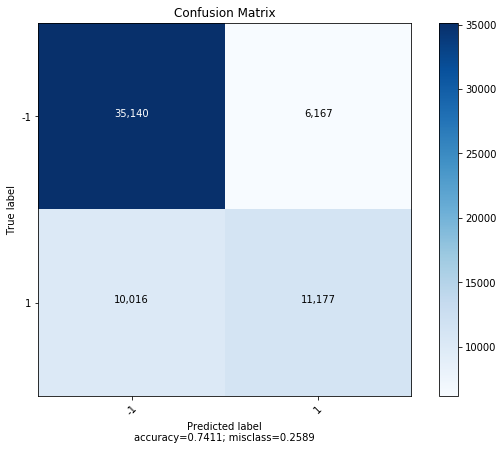

In [24]:
CM = confusion_matrix(y_test,model_logit.predict(x_test))
plot_confusion_matrix(cm           = CM, 
                      normalize    = False,
                      target_names = ['-1','1'],
                      title        = "Confusion Matrix")

In [25]:
np.unique(y_test,return_counts=True)

(array([-1,  1]), array([41307, 21193]))

#### Let's now try to fill -999 and do prediction

In [26]:
values_to_be_filled = dict()
for key, value in missing_values.items():
    if value>0:
        values_to_be_filled[key] = np.mean(data[key][data[key]!=-999])

In [27]:
values_to_be_filled

{'DER_mass_MMC': 121.85852835958957,
 'DER_deltaeta_jet_jet': 2.4037350261224373,
 'DER_mass_jet_jet': 371.78336044828586,
 'DER_prodeta_jet_jet': -0.8216881711536604,
 'DER_lep_eta_centrality': 0.45828980053209817,
 'PRI_jet_leading_pt': 84.82210453270434,
 'PRI_jet_leading_eta': -0.003274587405971204,
 'PRI_jet_leading_phi': -0.012392825494546495,
 'PRI_jet_subleading_pt': 57.67947442206691,
 'PRI_jet_subleading_eta': -0.011845264188136691,
 'PRI_jet_subleading_phi': -0.0015822891250706485}

In [28]:
data_filled_mean = data.copy()
for key, value in values_to_be_filled.items():
    data_filled_mean[key] = data_filled_mean[key].replace(-999,value)

#### Outlier analysis

In [29]:
def find_outliers(df,column):
    '''returns indices of outliers'''
    Q1,Q2,Q3 = df[column].quantile([0.25,0.5,0.75])
    IQR = Q3-Q1
    A = np.inf # lower fence
    B = -np.inf # upper fence
    for elem in df[column]:
        if elem>=Q1 - 1.5*IQR:
            A = min(A,elem)
        if elem<=Q3 + 1.5*IQR:
            B = max(B,elem)
    return df[column][(df[column]<A) | (df[column]>B)].index 

In [30]:
for each in new_columns:
    print(each + ':',len(find_outliers(data_filled_mean,each)))

DER_mass_transverse_met_lep: 1850
DER_mass_vis: 14611
DER_pt_h: 13891
DER_deltar_tau_lep: 644
DER_pt_tot: 8633
DER_sum_pt: 12289
DER_pt_ratio_lep_tau: 9566
DER_met_phi_centrality: 0
PRI_tau_pt: 13925
PRI_tau_eta: 0
PRI_tau_phi: 0
PRI_lep_pt: 13434
PRI_lep_eta: 0
PRI_lep_phi: 0
PRI_met: 13299
PRI_met_phi: 0
PRI_met_sumet: 10307
PRI_jet_num: 0
PRI_jet_all_pt: 11153


In [31]:
indx_to_be_dropped = set()
for each in new_columns:
    indx_to_be_dropped=indx_to_be_dropped.union(find_outliers(data_filled_mean,each))

In [32]:
data_no_outliers = data_filled_mean[~data_filled_mean.index.isin(indx_to_be_dropped)].copy()
y_no_outliers = y[~y.index.isin(indx_to_be_dropped)].copy()

In [33]:
data_no_outliers.shape

(196147, 30)

In [34]:
data_no_outliers.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.910000,124.71100,2.666000,3.064,41.928,197.760,1.582,1.396,0.20000,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435000,2.150000,0.444000,46.062000,1.240000,-2.475000,113.497
1,160.937,68.768,103.235,48.146,2.403735,371.78336,-0.821688,3.473,2.078,125.157,0.879,1.414,0.45829,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226000,0.725000,1.158000,57.679474,-0.011845,-0.001582,46.226
3,143.905,81.417,80.943,0.414,2.403735,371.78336,-0.821688,3.310,0.414,75.968,2.354,-1.285,0.45829,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,0.000
4,175.864,16.915,134.805,16.405,2.403735,371.78336,-0.821688,3.891,16.405,57.983,1.056,-1.385,0.45829,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,0.000
5,89.744,13.550,59.149,116.344,2.636000,284.58400,-0.540000,1.362,61.619,278.876,0.588,0.479,0.97500,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547000,-2.412000,-0.653000,56.165000,0.224000,3.106000,193.660


In [35]:
# standardize data
data_no_outliers = pd.DataFrame(preprocessing.StandardScaler().fit_transform(data_no_outliers.values),columns=data_no_outliers.columns)
data_no_outliers.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,0.872762,0.130445,1.083135,-0.335917,-1.831440,-1.407135,1.961684,0.946123,1.804411,1.194763,0.405142,1.355541,-1.425080,-0.132872,0.850849,0.216321,0.824183,1.812091,-1.355668,-0.918002,-0.145040,1.052570,1.387410,-0.268613,1.594223,0.347890,-1.115560,1.289438,-2.952379,1.170120
1,1.622264,0.687530,1.322893,0.209196,-0.036783,0.045686,0.013806,1.553174,-0.895599,0.051015,-0.832685,1.370585,-0.019609,0.615855,1.696132,-1.650028,-0.375877,0.412619,0.030747,0.527747,-1.049023,-0.115347,0.243966,-1.142467,0.539911,0.887972,0.260958,-0.000233,-0.001845,0.002326
2,1.054075,1.099297,0.334601,-1.081061,-0.036783,0.045686,0.013806,1.311244,-1.008342,-0.723882,1.764462,-0.885156,-0.019609,-0.930711,-1.359129,0.012189,0.962482,-0.395315,-1.733530,-0.178637,0.040831,-1.088546,-0.899479,0.447771,0.001084,0.002667,0.260958,-0.000233,-0.001845,-0.800136
3,2.120231,-1.000458,2.722515,-0.648804,-0.036783,0.045686,0.013806,2.173583,0.075117,-1.007207,-0.521027,-0.968733,-0.019609,-0.486553,-1.807411,-1.220856,-0.958772,0.647181,0.838250,-1.649225,-0.472658,-1.496890,-0.899479,0.447771,0.001084,0.002667,0.260958,-0.000233,-0.001845,-0.800136
4,-0.752743,-1.110000,-0.631612,2.052675,0.242273,-0.467059,0.171129,-1.580040,3.138562,2.472620,-1.345071,0.589141,2.792044,1.545136,0.316550,0.737930,-0.812640,-0.681212,0.996886,0.321930,1.241545,1.351608,2.530854,0.683649,-1.781055,-0.481899,0.081512,0.242739,3.705183,2.561713


In [36]:
print('Number of 1s = {}'.format(len(y_no_outliers[y_no_outliers==1])))
print('Number of -1s = {}'.format(len(y_no_outliers[y_no_outliers==-1])))

Number of 1s = 66717
Number of -1s = 129430


In [37]:
model_logit_4 = LogisticRegression(random_state=42)
model_gb = GradientBoostingClassifier(random_state=42)

In [38]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(data_no_outliers,y_no_outliers,test_size=0.25,random_state = 42)

In [39]:
print("LogisticRegression")
model_logit_4.fit(x_train,y_train)
print('Train set accuracy = {}%'.format(model_logit_4.score(x_train,y_train)*100))
print('Test set accuracy = {}%'.format(model_logit_4.score(x_test,y_test)*100))

print('-------------------------------------')

print("GradientBoostingClassifier")
model_gb.fit(x_train,y_train)
print('Train set accuracy = {}'.format(model_gb.score(x_train,y_train)*100))
print('Test set accuracy = {}'.format(model_gb.score(x_test,y_test)*100))

LogisticRegression
Train set accuracy = 77.52634083338998%
Test set accuracy = 77.11116096009137%
-------------------------------------
GradientBoostingClassifier
Train set accuracy = 82.42607572564748
Test set accuracy = 81.84432163468401


In [40]:
pd.DataFrame(data=model_gb.feature_importances_,columns = ["importance"],index = data_no_outliers.columns)\
.sort_values(by='importance',ascending=False)

,importance
DER_mass_transverse_met_lep,0.338696
DER_mass_MMC,0.321725
PRI_tau_pt,0.069188
DER_met_phi_centrality,0.065278
DER_mass_vis,0.054964
DER_deltar_tau_lep,0.037862
DER_mass_jet_jet,0.019285
DER_lep_eta_centrality,0.018943
DER_deltaeta_jet_jet,0.018180
DER_pt_h,0.016182


In [41]:
best_features = ['DER_mass_transverse_met_lep',
                 'DER_mass_MMC',
                 'PRI_tau_pt',
                 'DER_met_phi_centrality',
                 'DER_mass_vis',
                 'DER_deltar_tau_lep']

In [42]:
data_no_outliers = data_no_outliers[best_features]
data_no_outliers.head()

,DER_mass_transverse_met_lep,DER_mass_MMC,PRI_tau_pt,DER_met_phi_centrality,DER_mass_vis,DER_deltar_tau_lep
0,0.130445,0.872762,-0.132872,1.355541,1.083135,0.946123
1,0.687530,1.622264,0.615855,1.370585,1.322893,1.553174
2,1.099297,1.054075,-0.930711,-0.885156,0.334601,1.311244
3,-1.000458,2.120231,-0.486553,-0.968733,2.722515,2.173583
4,-1.110000,-0.752743,1.545136,0.589141,-0.631612,-1.580040


In [43]:
from itertools import combinations

comb = list(combinations(data_no_outliers.columns,2))

for each in data_no_outliers.columns:
    data_no_outliers[each+'^2'] = data_no_outliers[each]**2
    
for elem in comb:
    data_no_outliers[elem[0]+'x'+elem[1]] = data_no_outliers[elem[0]]*data_no_outliers[elem[1]]
    
print(data_no_outliers.shape)

(196147, 27)


In [44]:
model_logit_4 = LogisticRegression(random_state=42)
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(data_no_outliers,y_no_outliers,test_size=0.25,random_state = 42)
print("LogisticRegression")
model_logit_4.fit(x_train,y_train)
print('Train set accuracy = {}%'.format(model_logit_4.score(x_train,y_train)*100))
print('Test set accuracy = {}%'.format(model_logit_4.score(x_test,y_test)*100))

LogisticRegression
Train set accuracy = 80.42553191489363%
Test set accuracy = 80.13948651018619%


#### Let's change the threshold

In [ ]:
# def change_threshold(prediction, thr):
#     res = []
#     for each in prediction[:,0]: #-1
#         if each>thr:
#             res.append(-1)
#         else:
#             res.append(1)
#     return np.array(res)

#### Let's now try to drop the rows with -999 values

In [45]:
print('Number of rows with at least one value of -999 = {}'.format(np.count_nonzero((data==-999).sum(axis=1))))

Number of rows with at least one value of -999 = 181886


In [46]:
rows_to_be_dropped = (data==-999).sum(axis=1).nonzero()[0]
rows_to_be_dropped

array([     1,      2,      3, ..., 249997, 249998, 249999])

In [ ]:
# Let's take only the data with the those rows which don't have -999; so basically we are dropping 181,886 rows
# out of our 250,000 rows
data_dropped_rows = data[~data.index.isin(rows_to_be_dropped)].copy()
y_new = y[~y.index.isin(rows_to_be_dropped)].copy()

In [ ]:
# let's look at the distribution of 0s and 1s
print('Number of 1s = {}'.format(len(y_new[y_new==1])))
print('Number of -1s = {}'.format(len(y_new[y_new==-1])))

In [ ]:
model_logit_3 = LogisticRegression(random_state=42)

In [ ]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(data_dropped_rows,y_new,test_size=0.25,random_state = 42)

In [ ]:
print("LogisticRegression")
model_logit_3.fit(x_train,y_train)
print('Train set accuracy = {}%'.format(model_logit_2.score(x_train,y_train)*100))
print('Test set accuracy = {}%'.format(model_logit_2.score(x_test,y_test)*100))

### Making submission

In [47]:
from proj1_helpers import *

In [48]:
real_test_data = pd.read_csv('../data/test.csv')

In [49]:
real_test_data.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,?,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,56.018,1.536,-1.404,-999.000,22.088,-0.540,-0.609,33.930,-0.504,-1.511,48.509,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
1,350001,?,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,132.865,1.777,-1.204,-999.000,30.716,-1.784,3.054,54.574,-0.169,1.795,21.093,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,?,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,97.600,1.096,-1.408,-999.000,46.564,-0.298,3.079,51.036,-0.548,0.336,19.461,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,?,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,94.112,0.819,-1.382,-999.000,51.741,0.388,-1.408,42.371,-0.295,2.148,25.131,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,?,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,1.713,-0.913,0.004,45.087,-1.548,1.877,77.252,-1.913,2.838,22.200,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [50]:
real_test_data.shape

(568238, 32)

In [51]:
ids = real_test_data.Id

In [52]:
real_test_data = real_test_data.drop(['Id','Prediction'],axis=1)

In [53]:
missing_values_test = dict()
for each in real_test_data.columns:
    missing_values_test[each] = np.sum(real_test_data[each]==-999)

In [54]:
missing_values_test

{'DER_mass_MMC': 86488,
 'DER_mass_transverse_met_lep': 0,
 'DER_mass_vis': 0,
 'DER_pt_h': 0,
 'DER_deltaeta_jet_jet': 402796,
 'DER_mass_jet_jet': 402796,
 'DER_prodeta_jet_jet': 402796,
 'DER_deltar_tau_lep': 0,
 'DER_pt_tot': 0,
 'DER_sum_pt': 0,
 'DER_pt_ratio_lep_tau': 0,
 'DER_met_phi_centrality': 0,
 'DER_lep_eta_centrality': 402796,
 'PRI_tau_pt': 0,
 'PRI_tau_eta': 0,
 'PRI_tau_phi': 0,
 'PRI_lep_pt': 0,
 'PRI_lep_eta': 0,
 'PRI_lep_phi': 0,
 'PRI_met': 0,
 'PRI_met_phi': 0,
 'PRI_met_sumet': 0,
 'PRI_jet_num': 0,
 'PRI_jet_leading_pt': 227458,
 'PRI_jet_leading_eta': 227458,
 'PRI_jet_leading_phi': 227458,
 'PRI_jet_subleading_pt': 402796,
 'PRI_jet_subleading_eta': 402796,
 'PRI_jet_subleading_phi': 402796,
 'PRI_jet_all_pt': 0}

In [55]:
# Let'replace -999 by mean values
values_to_be_filled_test = dict()
for key, value in missing_values_test.items():
    if value>0:
        values_to_be_filled_test[key] = np.mean(real_test_data[key][real_test_data[key]!=-999])

values_to_be_filled_test

{'DER_mass_MMC': 121.87172934302023,
 'DER_deltaeta_jet_jet': 2.4050162836522766,
 'DER_mass_jet_jet': 372.3554286517329,
 'DER_prodeta_jet_jet': -0.8318327087438497,
 'DER_lep_eta_centrality': 0.45856330315155774,
 'PRI_jet_leading_pt': 84.9404791331651,
 'PRI_jet_leading_eta': -0.00035545513234344666,
 'PRI_jet_leading_phi': -0.021703145724514355,
 'PRI_jet_subleading_pt': 57.867644310392784,
 'PRI_jet_subleading_eta': -0.0043993786342041334,
 'PRI_jet_subleading_phi': -0.014366654174876998}

In [56]:
for key, value in values_to_be_filled_test.items():
    real_test_data[key] = real_test_data[key].replace(-999,value)

In [57]:
real_test_data.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,121.871729,79.589,23.916,3.036,2.405016,372.355429,-0.831833,0.903,3.036,56.018,1.536,-1.404,0.458563,22.088,-0.540,-0.609,33.930,-0.504,-1.511,48.509,2.022,98.556,0,84.940479,-0.000355,-0.021703,57.867644,-0.004399,-0.014367,0.000
1,106.398000,67.490,87.949,49.994,2.405016,372.355429,-0.831833,2.048,2.679,132.865,1.777,-1.204,0.458563,30.716,-1.784,3.054,54.574,-0.169,1.795,21.093,-1.138,176.251,1,47.575000,-0.553000,-0.849000,57.867644,-0.004399,-0.014367,47.575
2,117.794000,56.226,96.358,4.137,2.405016,372.355429,-0.831833,2.755,4.137,97.600,1.096,-1.408,0.458563,46.564,-0.298,3.079,51.036,-0.548,0.336,19.461,-1.868,111.505,0,84.940479,-0.000355,-0.021703,57.867644,-0.004399,-0.014367,0.000
3,135.861000,30.604,97.288,9.104,2.405016,372.355429,-0.831833,2.811,9.104,94.112,0.819,-1.382,0.458563,51.741,0.388,-1.408,42.371,-0.295,2.148,25.131,1.172,164.707,0,84.940479,-0.000355,-0.021703,57.867644,-0.004399,-0.014367,0.000
4,74.159000,82.772,58.731,89.646,1.347000,536.663000,-0.339000,1.028,77.213,721.552,1.713,-0.913,0.004000,45.087,-1.548,1.877,77.252,-1.913,2.838,22.200,-0.231,869.614,3,254.085000,-1.013000,-0.334000,185.857000,0.335000,2.587000,599.213


In [58]:
# standardize data
real_test_data = pd.DataFrame(preprocessing.StandardScaler().fit_transform(real_test_data.values),columns=real_test_data.columns)
real_test_data.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,-5.435859e-16,0.856956,-1.413410,-0.865550,0.000000,5.287577e-16,-1.722526e-16,-1.886222,-0.733286,-0.882951,0.114415,-1.069195,-7.756358e-16,-0.740138,-0.435218,-0.326938,-0.576137,-0.383810,-0.861464,0.212941,1.119734,-0.877484,-1.000876,-6.051894e-16,-2.639111e-17,2.466712e-18,8.064140e-16,2.373616e-17,-4.249712e-17,-0.744057
1,-2.959463e-01,0.515113,0.168668,-0.123769,0.000000,5.287577e-16,-1.722526e-16,-0.418231,-0.749692,-0.221948,0.399531,-0.901763,-7.756358e-16,-0.355585,-1.460554,1.690377,0.354767,-0.118764,0.960599,-0.635349,-0.623316,-0.265500,0.020164,-7.956309e-01,-4.015582e-01,-5.881927e-01,8.064140e-16,2.373616e-17,-4.249712e-17,-0.260917
2,-7.798954e-02,0.196862,0.376431,-0.848157,0.000000,5.287577e-16,-1.722526e-16,0.488205,-0.682690,-0.525282,-0.406129,-1.072543,-7.756358e-16,0.350765,-0.235756,1.704145,0.195227,-0.418623,0.156488,-0.685845,-1.025983,-0.775488,-1.000876,-6.051894e-16,-2.639111e-17,2.466712e-18,8.064140e-16,2.373616e-17,-4.249712e-17,-0.744057
3,2.675550e-01,-0.527058,0.399409,-0.769695,0.000000,5.287577e-16,-1.722526e-16,0.560002,-0.454431,-0.555284,-0.733835,-1.050777,-7.756358e-16,0.581505,0.329662,-0.766970,-0.195505,-0.218453,1.155151,-0.510407,0.650875,-0.356429,-1.000876,-6.051894e-16,-2.639111e-17,2.466712e-18,8.064140e-16,2.373616e-17,-4.249712e-17,-0.744057
4,-9.125407e-01,0.946888,-0.553228,0.502602,-1.125163,7.641948e-01,2.548789e-01,-1.725961,2.675516,4.841671,0.323815,-0.658151,-2.117146e+00,0.284935,-1.266037,1.042171,1.377390,-1.498589,1.535436,-0.601097,-0.123017,5.195946,2.062245,3.601630e+00,-7.357998e-01,-2.220373e-01,7.262927e+00,3.095993e-01,2.655337e+00,5.341150


In [59]:
real_test_data = real_test_data[best_features]

In [60]:
real_test_data.head()

,DER_mass_transverse_met_lep,DER_mass_MMC,PRI_tau_pt,DER_met_phi_centrality,DER_mass_vis,DER_deltar_tau_lep
0,0.856956,-5.435859e-16,-0.740138,-1.069195,-1.413410,-1.886222
1,0.515113,-2.959463e-01,-0.355585,-0.901763,0.168668,-0.418231
2,0.196862,-7.798954e-02,0.350765,-1.072543,0.376431,0.488205
3,-0.527058,2.675550e-01,0.581505,-1.050777,0.399409,0.560002
4,0.946888,-9.125407e-01,0.284935,-0.658151,-0.553228,-1.725961


In [61]:
comb = list(combinations(real_test_data.columns,2))

for each in real_test_data.columns:
    real_test_data[each+'^2'] = real_test_data[each]**2
    
for elem in comb:
    real_test_data[elem[0]+'x'+elem[1]] = real_test_data[elem[0]]*real_test_data[elem[1]]
    
print(real_test_data.shape)

(568238, 27)


In [62]:
prediction = model_logit_4.predict(real_test_data)
prediction

array([-1, -1, -1, ...,  1, -1, -1])

In [63]:
create_csv_submission(ids,prediction,'submission')